# Implementing a Neural Network for Handwritten Digit Recognition

In this mini-project, I have applied the theory of neural networks that I have learnt in Week 5 of the Andrew Ng Machine Learning to build a classification algorithm from scratch and applied it to the recognition of handwritten digits from the MNIST data set, which was used in the previous mini-project on logistic regression. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.datasets import fetch_mldata
import random as rd
%matplotlib inline

In [4]:
# Load image data
mnist = fetch_mldata('MNIST original')

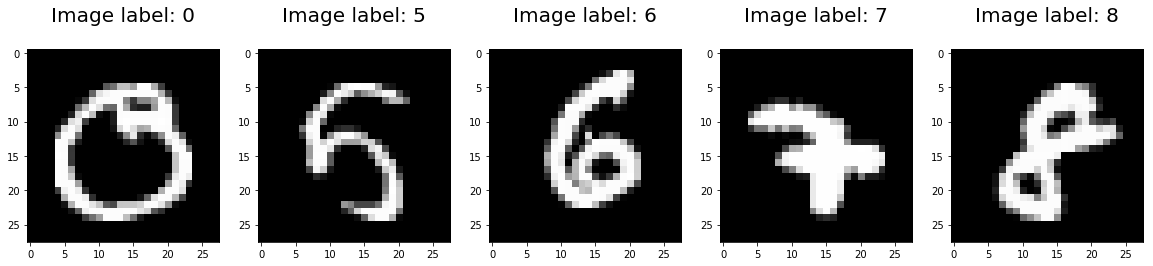

In [5]:
# Dispay image data
im_list = rd.sample(range(0,len(mnist.data)),5)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[im_list], mnist.target[im_list])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Image label: %i\n' % label, fontsize = 20)

In [6]:
# Feature variable matrix (X)
X = mnist.data

X = X / 255 # Normalize the input variables

# Target variable vector (y)
y = mnist.target
y = y.astype(int)

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [7]:
# Partioning into Training and Test Data
indices = np.random.permutation(X.shape[0])
pctg = round(0.8*len(X))
training_idx, test_idx = indices[:pctg], indices[pctg:]
X_trn, X_tst = X[training_idx,:], X[test_idx,:]
y_trn, y_tst = y[training_idx], y[test_idx]

print(X_trn.shape)
print(X_tst.shape)
print(y_trn.shape)
print(y_tst.shape)

(56000, 784)
(14000, 784)
(56000,)
(14000,)


In this model, the sigmoid function has been used for the activation the hidden layer. The derivative of the sigmoid function is used in the backpropagation part of the algorithm and is also defined below. 

In [8]:
# Sigmoid Function
def sigmoid(z):
    
    return 1 / (1 + np.exp(-z))

# Sigmoid Gradient
def sigmoidGrad(z):
    
    return np.multiply(sigmoid(z), 1-sigmoid(z))

The softmax function has been used for the activation of the output layer and the cross-entropy function has been used as the loss function.

In [9]:
# Calculate loss function
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2) # Softmax activation function
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    # Calculating the loss - cross-entropy loss function
    corect_logprobs = -np.log(probs[range(num_examples), y]) 
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [10]:
# Calculate predict function
def predict(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate predictions
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims = True)
    return np.argmax(probs, axis=1)

In [11]:
## Neural Network
num_examples = X.shape[0]
nn_input_dim = X.shape[1] # number of feature variables in data
nn_output_dim = 10 # number of classification labels

# Gradient descent parameters
alpha = 0.00001 # learning rate for gradient descent
reg_lambda = 0.01 # regularization factor

The section below shows the code for the neural network algorithm consisting of the following sections:

- Parameter randomization to break symmetry
- Feed forward to calculate the probability of the possible classification labels
- Backpropagation to update and learn the parameters based on the prediction error
- Calculate the value of the loss function 

In [12]:
# Model training
def build_model(X, y, nn_hdim, num_passes=1000, print_loss=False):
    
    # Initialize the parameters to random values to learn
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    # This is returned
    model = {}
    J = []
    
    # Gradient descent 
    for i in range(0, num_passes):
    
        # Feed forward
        z1 = X.dot(W1) + b1
        a1 = sigmoid(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * sigmoidGrad(z1)
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        # Add regularization terms (b1 and b2 don't have regularization)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        # Gradient descent parameter update
        W1 += -alpha * dW1
        b1 += -alpha * db1
        W2 += -alpha * dW2
        b2 += -alpha * db2
        
        # Update the model parameters
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Print loss during training to check convergence
        if print_loss and i % 1 == 0:
        
          J.append(calculate_loss(model))
          print("Loss after iteration %i: %f" %(i, J[-1]))
            
    return model, J

In this mini-project, I have used the code shown above to build a neural network classifier with three layers; one input layer, one hidden layer with 25 nodes and one output layer. 

In [19]:
# Build model
model, J = build_model(X_trn, y_trn, 25, 1000, print_loss=True)

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (70000,) (56000,) 

Whenever I am developing or testing a new model, I like to record the value of the loss function after each iteration to check that the model is converging. 

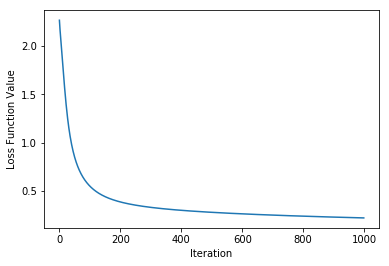

In [18]:
# Plot loss vs. iteration
plt.plot(J)
plt.xlabel('Iteration')
plt.ylabel('Loss Function Value')
filename = 'NN-J-Iter.png'
plt.savefig(filename, transparent=False, dpi=200, bbox_inches="tight")

In [15]:
# Predict
pred = predict(model, X)
print('Prediction accuracy: ', np.round(np.mean(pred == y.flatten()) * 100), '%')

Prediction accuracy:  94.0 %
